In [1]:
import tensorflow as tf

tf.config.experimental.get_visible_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
import numpy as np

valid_X = train_images[:5000] / 255.0
valid_y = train_labels[:5000]
train_X = train_images[5000:] / 255.0
train_y = train_labels[5000:]
test_X = test_images / 255.0
test_y = test_labels

valid_X = valid_X[..., np.newaxis]
train_X = train_X[..., np.newaxis]
test_X = test_X[..., np.newaxis]

In [4]:
train_X.shape

(55000, 28, 28, 1)

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_X, valid_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y))

In [6]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
plt.set_cmap("Greys")
for i, item in train_dataset.take(columns * rows).enumerate().as_numpy_iterator():
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(item[0])
    plt.xlabel(class_names[item[1]])
    plt.tight_layout()
    plt.colorbar()
    plt.grid(False)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
batch_size = 128
prefetch = tf.data.experimental.AUTOTUNE

train_dataset_batch = train_dataset.batch(batch_size).prefetch(prefetch)
valid_dataset_batch = valid_dataset.batch(batch_size).prefetch(prefetch)
test_dataset_batch = test_dataset.batch(batch_size).prefetch(prefetch)

In [8]:
from tensorflow import keras

keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [10]:
from datetime import datetime
logs = "./training_logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '50,100')

history = model.fit(train_dataset_batch, epochs=10, validation_data=valid_dataset_batch, callbacks = [tboard_callback])

Epoch 1/10
430/430 [==============================] - 60s 140ms/step - loss: 0.6157 - accuracy: 0.7877 - val_loss: 0.3633 - val_accuracy: 0.8718
Epoch 2/10
430/430 [==============================] - 55s 128ms/step - loss: 0.4098 - accuracy: 0.8607 - val_loss: 0.2929 - val_accuracy: 0.8922
Epoch 3/10
430/430 [==============================] - 55s 128ms/step - loss: 0.3459 - accuracy: 0.8821 - val_loss: 0.2650 - val_accuracy: 0.9026
Epoch 4/10
  1/430 [..............................] - ETA: 54s - loss: 0.3918 - accuracy: 0.8672

KeyboardInterrupt: 

In [105]:
model.evaluate(test_dataset_batch)

79/79 [==============================] - 3s 35ms/step - loss: 0.2767 - accuracy: 0.9118


[0.27665308117866516, 0.9118000268936157]

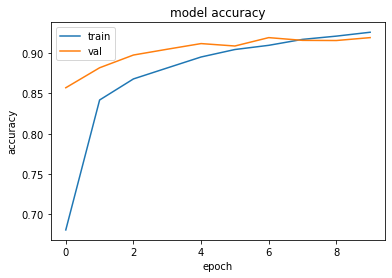

In [106]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
from tensorflow import keras

model2 = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history2 = model2.fit(train_dataset_batch, epochs=1, validation_data=valid_dataset_batch)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_1/conv2d_5/Conv2D (defined at <ipython-input-9-a751babb1665>:20) ]] [Op:__inference_train_function_3859]

Function call stack:
train_function
